Preface, how to use

each module contains examples in if __name__ == '__main__' runnable with python -m assignments.module_name or assignments.package.module_name.

Also comments in the code/possibly self-explanatory

This just compiles the examples in one file and provides some comments.

# Sequence alignment using edit distance


### and alignment module

You can get all optimal alignments w.r.t. edit distance with `EditDistanceComputer`. It is a subclass of `AlignmentComputer`. I had to create my own generic alignment computer for assignment 9 (structure superposition) because of the requirement of a specialized match function called with arguments allowing it identify a specific residue. It was not possible with BioPython's alignment library functions.

The alignment reconstruction is done by saving the optimal step(s) to a scoring matrix cell (`paths` matrix) during the computation of the scoring matrix. It wasn't possible to reconstruct the alignments in O(n+m) time just by using the scoring matrix when more complex gap/match score functions were employed (e.g. gap extensions vs gap opening). It could be done with this simple edit distance metric, but since I had to redo it anyway due to assignment 9, I replaced the old code with the generic alignment computer.

In [13]:
from assignments.edit_distance import EditDistanceComputer

alignments = EditDistanceComputer("clock", "overclocking").compute()
for al in alignments:
    print(al)
    print('distance:', al.distance)
    print()

----clock---
overclocking
distance: 7.0



In the case above and below there is only one optimal alignment (corresponding to the smallest distance, that is the least insert/delete/replace operations to turn one sequence into another).

In [14]:
alignments = EditDistanceComputer("clock", "lacks").compute()
for al in alignments:
    print(al)
    print('distance:', al.distance)
    print()

clock-
-lacks
distance: 3.0



There are more optimal alignments in the following example:

In [15]:
alignments = EditDistanceComputer("pitbull", "mr.worldwide").compute()

Yet not too many, so I it is possible to get all of them and put them into a list:

In [16]:
alignments = list(alignments)
print(f'There are {len(alignments)} optimal alignments: ')
print()

for al in reversed(alignments):  # it looks better when iterating in reverse
    print(al)
    print('distance:', al.distance)
    print()

There are 31 optimal alignments: 

pitbull-----
mr.worldwide
distance: 11.0

pitbu-ll----
mr.worldwide
distance: 11.0

pitb-ull----
mr.worldwide
distance: 11.0

pit-bull----
mr.worldwide
distance: 11.0

pi-tbull----
mr.worldwide
distance: 11.0

p-itbull----
mr.worldwide
distance: 11.0

-pitbull----
mr.worldwide
distance: 11.0

pitbu-l-l---
mr.worldwide
distance: 11.0

pitb-ul-l---
mr.worldwide
distance: 11.0

pit-bul-l---
mr.worldwide
distance: 11.0

pi-tbul-l---
mr.worldwide
distance: 11.0

p-itbul-l---
mr.worldwide
distance: 11.0

-pitbul-l---
mr.worldwide
distance: 11.0

pitbu-l--l--
mr.worldwide
distance: 11.0

pitb-ul--l--
mr.worldwide
distance: 11.0

pit-bul--l--
mr.worldwide
distance: 11.0

pi-tbul--l--
mr.worldwide
distance: 11.0

p-itbul--l--
mr.worldwide
distance: 11.0

-pitbul--l--
mr.worldwide
distance: 11.0

pitbu-l---l-
mr.worldwide
distance: 11.0

pitb-ul---l-
mr.worldwide
distance: 11.0

pit-bul---l-
mr.worldwide
distance: 11.0

pi-tbul---l-
mr.worldwide
distance: 11.0


# Processing FASTA files

BioPython library function `SeqIO.parse`, returns `SeqRecord` object already possessing the abilities required in this assignment: 

Read in a FASTA files with an arbitrary number of molecules. `parse_fasta` calls BioPython's `SeqIO.parse` and passes 'fasta' as the argument for file format. 

In [4]:
import os
from assignments.fasta import parse_fasta

seq_records = list(parse_fasta('assignments/fasta/test_data/seq1.fasta'))

seq_record = seq_records[0]

Obtain description/sequence of any molecules

In [5]:
print(seq_record.description)
print()
print(seq_record.seq)


NM_018189.3 Homo sapiens developmental pluripotency associated 4 (DPPA4), transcript variant 1, mRNA

AAGTGGGAGGAGACTTTGCAAATAGCAATCTTGGGGCAGGGGCCATTTTGGAAGCATGTTGCGAGGCTCCGCTTCTTCTACAAGTATGGAGAAGGCAAAAGGCAAGGAGTGGACCTCCACAGAGAAGTCGAGGGAAGAGGATCAGCAGGCTTCTAATCAACCAAATTCAATTGCTTTGCCAGGAACATCAGCAAAGAGAACCAAAGAAAAAATGTCTATCAAAGGCAGTAAAGTGCTCTGCCCTAAGAAAAAGGCAGAGCACACTGACAACCCCAGACCTCAGAAGAAGATACCAATCCCTCCATTACCTTCTAAACTGCCACCTGTTAATCTGATTCACCGGGACATTCTGCGGGCCTGGTGCCAACAATTGAAGCTGAGCTCCAAAGGCCAGAAATTGGATGCATATAAGCGCCTGTGTGCCTTTGCCTACCCAAATCAAAAGGATTTTCCTAGCACAGCAAAAGAGGCCAAAATCCGGAAATCATTGCAAAAAAAATTAAAGGTGGAAAAGGGGGAAACGTCCCTGCAAAGTTCTGAGACACATCCTCCTGAAGTGGCTCTTCCTCCTGTGGGGGAGCCGCCTGCCCTGGAAAATTCCACTGCTCTCCTTGAGGGAGTTAATACAGTTGTGGTGACAACTTCTGCCCCAGAGGCTTTGCTGGCCTCCTGGGCGAGAATTTCAGCCAGGGCGAGGACACCAGAGGCAGTGGAATCTCCACAAGAGGCCTCTGGTGTCAGGTGGTGTGTGGTCCATGGGAAAAGTCTCCCTGCAGACACAGATGGTTGGGTTCACCTGCAGTTTCATGCTGGTCAAGCCTGGGTTCCAGAAAAGCAAGAAGGGAGAGTGAGTGCACTCTTCTTGCTTCCTGCCTCCAATTTTCCACCCCCGCACCTT

Return sequence length for given sequence

In [19]:
len(seq_record.seq)

2823

Return subsequence of given sequence

In [20]:
seq_record.seq[2:10]

Seq('GTGGGAGG', SingleLetterAlphabet())

# Measuring sequence similarity using Hamming distance

In [7]:
from assignments.hamming import hamming_distance

In [22]:
print(hamming_distance('abcd', 'abcd'))
print(hamming_distance('abcd', 'bbcw'))
print(hamming_distance('clock', 'lacks'))

seq_record = next(parse_fasta('assignments/fasta/test_data/seq1.fasta'))
print(hamming_distance(seq_record.seq, seq_record.seq))

0
2
5
0


Calling the function with two strings of different lengths raises an exception:

In [11]:
try:
    hamming_distance('ab', 'a')
except Exception as e:
    print('Exception caught')

Exception caught


# Processing multiple sequence alignment

Written CLUSTAL  Parser based on http://meme-suite.org/doc/clustalw-format.html specs.

Read and parse MSA.

In [24]:
from assignments.clustal_parser import parse_clustal

with open('assignments/clustal_parser/test_data/clustal_assigned') as f:
    msa = parse_clustal(f)

print(msa)

Alphabet() alignment with 55 rows and 530 columns
M-------------------------------------------...DSD UniRef90_A0A151
--------------------------------------------...DSE UniRef90_K7G3P4
--------------------------------------------...DSE UniRef90_UPI000
--------------------------------------------...GSE UniRef90_UPI000
--------------------------------------------...DSD UniRef90_L7NCR5
--------------------------------------------...DSD UniRef90_Q0GMA7
--------------------------------------------...DSD UniRef90_C0PUM1
--------------------------------------------...DSD UniRef90_UPI000
--------------------------------------------...DSD UniRef90_F5A7P3
--------------------------------------------...DSD UniRef90_O93379
--------------------------------------------...DSD UniRef90_Q9W678
--------------------------------------------...DSD UniRef90_UPI000
--------------------------------------------...DSD UniRef90_P25035
--------------------------------------------...DSD UniRef90_UPI000
------------

Retrieve sequence by its position (but not by ID which is not unique in the assigned input data)

In [25]:
print(msa[0])

ID: UniRef90_A0A151
Name: UniRef90_A0A151
Description: UniRef90_A0A151
Number of features: 0
Seq('M-----------------------------------------------RQMESI...DSD')


Retrieve given column from the MSA

In [26]:
print(msa[:,60])

DGGGM--EMM--NNP-SSL-TNGSSSSSSSSGSSSSSSSGNNSTSSS-SSN-SD-


Retrieve sum of pairs score of a column and whole MSA with respect to given scoring matrix.

In [27]:
from Bio.SubsMat import MatrixInfo

scoring_matrix = MatrixInfo.blosum62

print('SoP column 60:', msa.sum_of_pairs_column(60, scoring_matrix))
print('SoP of the alignment:', msa.sum_of_pairs(scoring_matrix))

SoP column 60: 1113
SoP of the alignment: 1806364


#### Conservation determination from multiple aligned sequences

You should be able to specify a sequence in the MSA and the method would return conservation scores for the positions of the MSA.

In [28]:
print('SoP of a substring:', msa.sum_of_pairs(scoring_matrix, start_pos=50, end_pos=100))

SoP of a substring: 118727


Moreover, one should be able to identify top N scoring positions in the MSA.

In [29]:
print(msa.top_n_scoring_positions(10, scoring_matrix))


[(74, 15741), (218, 13365), (259, 13365), (328, 13365), (332, 13365), (368, 13365), (370, 13365), (224, 12771), (261, 11880), (283, 11880)]


Returns a list of tuples (position, score).

# Processing PDB files

There is a PDB file parser in BioPython library. However the returned objects, representing the structure do not meet all the 
requirements specified in this assignment. Therefore I extended the classes with the required functionality and made the parser use them. 

The parser returns a `Structure` object. A `Structure` always contains at least one `Model`. `Model` contains `Chain`s and they are 
composed of `Residue`s. These 4 objects are subclasses of `Entity` which provides behavior for this tree structure of objects (possible to
 enumerate children and to get the parent). 
 
 `Atom` is the bottom-most object in the hierarchy. 
 
 Each instance of the 5 types objects has a 
 unique id within its parent (not exactly `Structure` it does not have a parent). Forms of ids: `Model` -- serial integer, corresponds to its 
 order in 
 the 
 file; 
 `Chain` -- 
 standard one letter code; `Residue` -- a triple of a hetero flag (`<space>` for no flag, 'W' for water, 'H' for hetatm), sequence number 
 (integer) and 
 insertion code (`<space>` or
  one 
 letter insertion code); `Atom` -- atom 
 name ('CA').

Parse a PDB file and obtain the structure:

In [4]:
import assignments.pdb.pdb as pdb
from Bio.PDB import PDBParser

pdb.attach_custom_classes_to_pdb_structure_builder()

# quiet mutes parser's warning output
structure = PDBParser(QUIET=True).get_structure('1tup', 'assignments/pdb/test_data/1tup.pdb')

Get the c alpha atom of residue number 94 in chain A in the first model:

In [5]:
print(structure[0]['A'][(' ', 94, ' ')]['CA'])

<Atom CA>


Obtain an object representing a model, 
structure (chain) within a model,
residuum within a chain,
atom within a residue.

(Traversing the tree topology of `Structure` object.)

In [6]:
for model in structure:
    print(model)

    for chain in model:
        print(chain)
        print('number of residues in chain:', len(chain))
        
        for residue in chain:
            if residue.id[0].startswith('H_'):
                # is HETATM record
                
                for atom in residue:
                    print(atom.get_name())
                    print(atom.get_serial_number())
                
                print(residue.id)

<Model id=0>
<Chain id=E>
number of residues in chain: 43
<Chain id=F>
number of residues in chain: 35
<Chain id=A>
number of residues in chain: 395
ZN
5447
('H_ ZN', 951, ' ')
<Chain id=B>
number of residues in chain: 265
ZN
5448
('H_ ZN', 952, ' ')
<Chain id=C>
number of residues in chain: 276
ZN
5449
('H_ ZN', 953, ' ')


Obtain information about the stored structure (number of models, structures, residues, atoms).

In [31]:
print(structure.count_chains)
print(structure.count_atoms)
print(structure[0]['A'].count_residues)

5
5828
395


<a id='structure_width_cell'></a>

Compute the width of the structure -- maximum of distance of any two atoms. Takes some time: naive 
$\Theta (\text{#atoms}^2)$ algorithm.


In [ ]:
print(pdb.structure_width(structure))


Obtain list of atoms or residues being in given distance from given ligand (HETATM)

In [ ]:
hetero_atoms = list(pdb.get_hetero_atoms(structure))
hetatm = hetero_atoms[0]

print(pdb.atoms_within_d_to_atom(structure, hetatm, 10))
print(pdb.residues_within_d_to_atom(structure, hetatm, 10))

# Computing structure-related properties

The essential part of this assignment -- decision if a particular residue is on surface of, or buried in the protein -- can be outsourced
 to a library method, or one can provide their own method. I have decided to come up with a couple methods myself and compare them with 
 the library method. 
 
 The library method is installed as a standalone program (instr. in repository's README), but it has a Python wrapper in the BioPython 
 library that makes it work with BioPython's structure objects. Original program description follows:

> In a first step, a probe sphere representing a solvent molecule is rolled over the set of spheres, 
> defining the Reduced Surface (RS). From the reduced surface the analytical model of the Solvent Excluded Surface (SES) is computed. 
> This analytical surface can be triangulated with a user specified vertex density.

The set of spheres (coordinates+radii) is generated from the structure's atoms by the BioPython wrapper and passed as the program's input. 
The surface is triangulated and returned to the BioPython's wrapper and one can then ask, for example, what is the average depth of a 
residue (average distance of residue's atoms to the surface) or for the c_alpha depth. 
At the time I did the programming, most sense for me made determining minimum depth of residue's atoms. The residue should 
have at least one atom on/close to the triangulated surface -- then it could be classified as a surface residue.

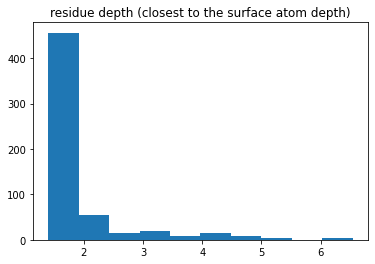

In [1]:
import os
from matplotlib import pyplot as plt
from Bio.PDB import PDBParser, ResidueDepth, get_surface
from Bio.PDB.ResidueDepth import min_dist

# # on my computer the plots were 2x smaller in the jupyter notebook somehow (probably web+retina)
# print(plt.rcParams['figure.figsize'])
# plt.rcParams['figure.figsize'] = list(map(lambda x: x*2, plt.rcParams['figure.figsize']))

from assignments.pdb.pdb import attach_custom_classes_to_pdb_structure_builder

attach_custom_classes_to_pdb_structure_builder()
structure = PDBParser(QUIET=True).get_structure('1tup', 'assignments/structure_related_properties/test_data/1tup.pdb')

model = next(structure.get_models())


from assignments.structure_related_properties.lib import get_model_without_waters

# model without hoh for surface analysis (not interested in surface of solvation (water) layer!, only protein)
model_without_waters = get_model_without_waters(model)
cp_to_original_residue = lambda r: model[r.get_parent().id][r.id]  # gets the corresponding residue in the original model

residue_depth = ResidueDepth(model_without_waters)

avg_residue_depth = {cp_to_original_residue(r): r_d for r, (r_d, calpha_d) in residue_depth}
calpha_residue_depth = {cp_to_original_residue(r): calpha_d for r, (r_d, calpha_d) in residue_depth}

surface = get_surface(model_without_waters)    
min_dist_to_surface = {r: min(min_dist(atom.get_coord(), surface) for atom in r) for r in model.aa_residues}

plt.hist(min_dist_to_surface.values())
plt.title('residue depth (closest to the surface atom depth)')
plt.show()

Note that the residue depth does not start at 0 angstroms. That's because the returned surface is based on the surface of the _spheres_, centered at atoms' coordinates (and depth is the distance to the surface from the atom coordinates). They have different radii, depending on atom type, mostly between 1 and 2 angstroms.

For evaluating the structural neighborhood of residues I chose to count in its surroundings: water molecules, residues and atoms. 

The last two methods in the following code differ from the others a little -- of all residue's atom choose the atom with minimum neighbors and return the count for that residue. They have the best correlation with residue's depth measured by the library (will be seen later).

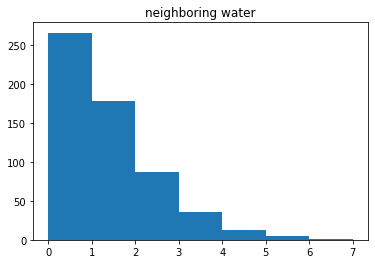

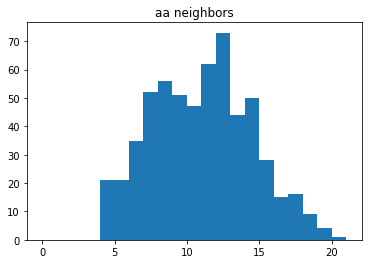

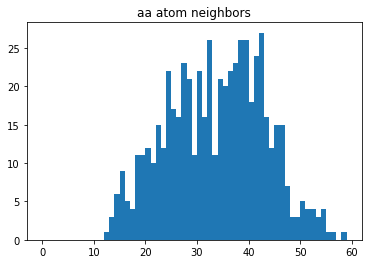

In [2]:
from assignments.structure_related_properties.lib import *

neighboring_water_counts = residues_get_neighboring_water_count(model, model.aa_residues, 3.5)
histogram_counts(neighboring_water_counts.values(), 'neighboring water')

neighbor_counts = residues_get_neighbor_count(model.aa_residues, 5)
histogram_counts(neighbor_counts.values(), 'aa neighbors')

neighbor_atom_counts = residues_get_neighbor_atom_count(model.aa_residues, 4.5)
histogram_counts(neighbor_atom_counts.values(), 'aa atom neighbors')

ratio_water_aas = {res: wc/ac for res, (wc, ac) in zip_mappings(neighboring_water_counts, neighbor_counts)}
ratio_water_aa_atoms = {res: wc/aac for res, (wc, aac) in zip_mappings(neighboring_water_counts, neighbor_atom_counts)}

residues_min_neighbor_residues_count = residues_get_min_neighbor_residues_count(model.aa_residues, 8.5)
residues_min_neighbor_atoms_count = residues_get_min_neighbor_atoms_count(model.aa_residues, 8.5)

I measured correlation of those structural-neighborhood methods with the results from the surface-computing library.

In [3]:
vars = np.transpose([values for k, values in zip_mappings(
        # based on surface computing program
        avg_residue_depth,
        calpha_residue_depth,
        min_dist_to_surface,

        # my variables
        neighboring_water_counts,
        neighbor_counts,
        neighbor_atom_counts,
        ratio_water_aas,
        ratio_water_aa_atoms,

        residues_min_neighbor_residues_count,
        residues_min_neighbor_atoms_count
    )])

print(np.corrcoef(vars))

[[ 1.          0.93086292  0.90785399 -0.06946207  0.6466452   0.52544156 -0.196897   -0.17374748  0.68933673  0.70641204]
 [ 0.93086292  1.          0.8087332  -0.01853723  0.62770217  0.51602029 -0.15658783 -0.12606481  0.62502189  0.64725568]
 [ 0.90785399  0.8087332   1.         -0.09348417  0.46227425  0.34576639 -0.16743996 -0.14855346  0.54564509  0.56600764]
 [-0.06946207 -0.01853723 -0.09348417  1.          0.00691785 -0.04818904  0.8916267   0.91951683 -0.05484552 -0.07255066]
 [ 0.6466452   0.62770217  0.46227425  0.00691785  1.          0.80075761 -0.26017425 -0.18944177  0.7896488   0.7805114 ]
 [ 0.52544156  0.51602029  0.34576639 -0.04818904  0.80075761  1.         -0.26205451 -0.29024273  0.61527546  0.65416953]
 [-0.196897   -0.15658783 -0.16743996  0.8916267  -0.26017425 -0.26205451  1.          0.95758862 -0.26016253 -0.27827227]
 [-0.17374748 -0.12606481 -0.14855346  0.91951683 -0.18944177 -0.29024273  0.95758862  1.         -0.20242197 -0.22961092]
 [ 0.68933673  0

The last two methods have the best correlation. However that's not the best metric for comparison, see below.

The neighboring-water-molecules method does have some results (better seen on the scatter plot below). But 1) just by looking at the structure it's not like the surface is consistently covered with water molecules (probably because of the method -- X-ray _crystallography_). However, one might think that at least presence of HOH in neighborhood might indicate that a residue is a surface one. Even this is not the case always, as during chain oligomerization, water molecules get trapped between the chains, thus not on the surface of protein (ok, on the surface of _chains_). In addition, they are also trapped inside the chain, during polypeptide folding (1tup.A.173 valine -- three HOH within 3.5 Å, but not on surface of model or chain). The method is not therefore very useful in deciding whether a residue is on surface or not.

I decided to also inspect the results with a scatter plot of my and library's methods of rate of 'buriedness'.
Provided that the library method is correct enough, with a good method I should see two clusters (surface and buried), that can be 
    demarcated by two perpendicular lines (each parallel to an axis), this cross would divide the datapoints into four quadrants and 
    ideally,
     only quadrants I (buried) and III (surface) would be occupied, provided that both axes show rate of 'buriedness'.

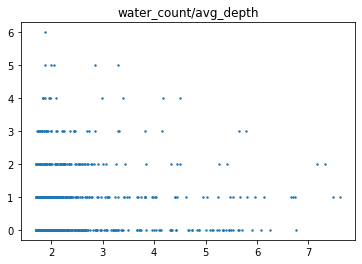

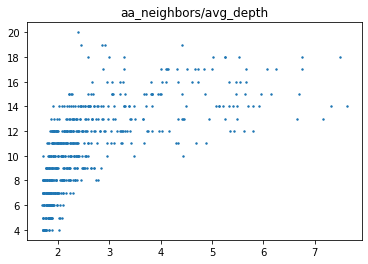

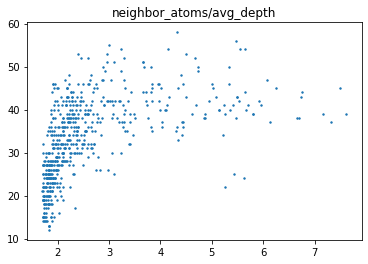

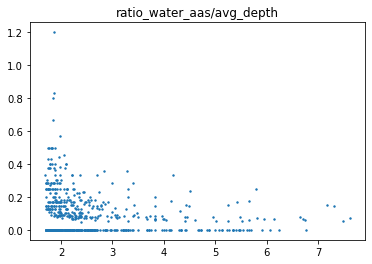

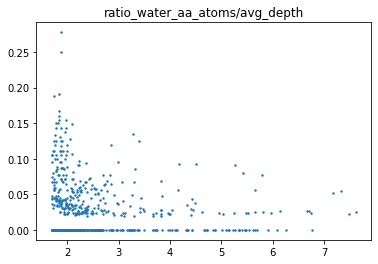

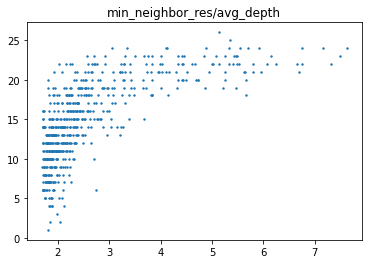

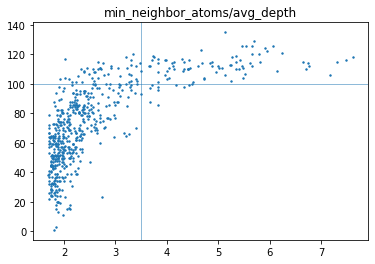

In [4]:
scatter(avg_residue_depth, neighboring_water_counts, 'water_count/avg_depth')
scatter(avg_residue_depth, neighbor_counts, 'aa_neighbors/avg_depth')
scatter(avg_residue_depth, neighbor_atom_counts, 'neighbor_atoms/avg_depth')
scatter(avg_residue_depth, ratio_water_aas, 'ratio_water_aas/avg_depth')
scatter(avg_residue_depth, ratio_water_aa_atoms, 'ratio_water_aa_atoms/avg_depth')
scatter(avg_residue_depth, residues_min_neighbor_residues_count, 'min_neighbor_res/avg_depth')
plt.axvline(x=3.5, lw=0.5)  # some values, just to divide the plot into those quadrants
plt.axhline(y=100, lw=0.5)
scatter(avg_residue_depth, residues_min_neighbor_atoms_count, 'min_neighbor_atoms/avg_depth')

The last two are most promising. However there are some outliers, that would be classified with library method as surface, with mine as 
buried and vice versa. I tuned the parameter -- radius of the neighborhood -- with visual inspection of scatters (looking for the two 'rectangular' clusters 
meeting with a corner). I did inspect both types of the outliers, but I don't really remember 
the results and it is probably out of scope for this homework. Nevertheless, I will point out some problems I see with the methods.

A problem with the atom-count-in-neighborhood is the variability of the value when a surface residue is in cavities/grooves or on 
the contrary on pointing-out loops. The virtual surface label is the same however.

The problem with the library method (that gets the protein surface and depths of residues) is in how it corresponds to the actual idea of 
deciding whether a residue is surface or buried. In hindsight, I should have had unequivocally defined what a surface residue is -- one of its atom spheres touches, or rather contributes _a minimum amount of surface_ to the solvent accessible surface. That's not quite the residue depth, in any of the three variants I have obtained from the library. 

Unless the touching is enough. In that case, `min_dist_to_surface` would be probably the best method to decide if the residue is surface or buried and I will therefore use it as the arbiter in the following tasks. I set the boundary to 2.3 Å, by looking at the residues in PyMOL.

A scatterplot similar to the last one follows (also shows `residues_min_neighbor_atoms_count`), although not with average depth of the residue, but with the minimum depth of its atoms. I added the mentioned surface/buried boundary.

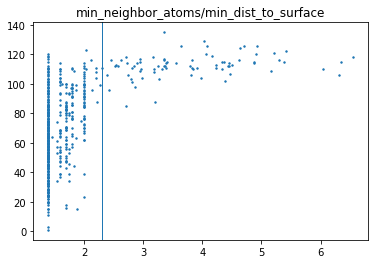

In [5]:
plt.axvline(x=2.3, lw=1)  # boundary surface/buried
scatter(min_dist_to_surface, residues_min_neighbor_atoms_count, 'min_neighbor_atoms/min_dist_to_surface')

### Actual tasks

Compute the diameter of the protein -- the [solution](#structure_width_cell) is already in task Processing PDB files.

Compute the ratio of surface and buried amino acids.

In [6]:
is_surface_fn = lambda aa: is_surface(min_dist_to_surface, aa)

ratio_surface_to_buried = get_ratio_surface_to_buried(model, is_surface_fn)
print('surface/buried: ', ratio_surface_to_buried)

surface/buried:  6.5


Output a histogram of amino acids composition of buried and exposed amino acids.

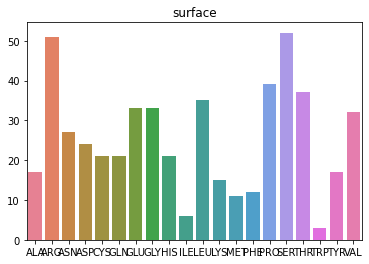

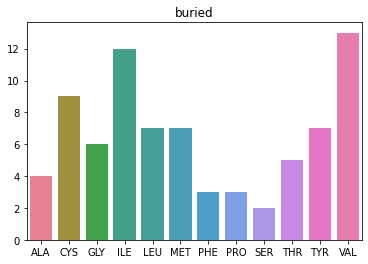

In [7]:
aa_types_surface = get_aa_counts(filter(is_surface_fn, model.aa_residues))
aa_types_buried = get_aa_counts(filter(lambda aa: not is_surface_fn(aa), model.aa_residues))

import seaborn as sns
# one palette for both histograms
aa_types = sorted(set(itertools.chain(aa_types_surface, aa_types_buried)))
palette = dict(zip(aa_types, sns.color_palette('husl', len(aa_types))))

sns.barplot(*np.transpose(sorted(aa_types_surface.items())), palette=palette).set_title('surface')
plt.show()

sns.barplot(*np.transpose(sorted(aa_types_buried.items())), palette=palette).set_title('buried')
plt.show()

Quantify portion of polar amino acids in the core and on the surface of the protein. 

In [16]:
for aa_counts, location_str in ((aa_types_buried, 'buried'), (aa_types_surface, 'surface')):
    polar_count = count_polar_aas(aa_counts)

    print(f'Ratio of polar aas {location_str}: ', polar_count/sum((count for count in aa_counts.values())))

Ratio of polar aas buried:  0.21052631578947367
Ratio of polar aas surface:  0.7967479674796748


Use the structures of A2a and caffeine receptor and hemoglobin (1b0b) to quantify the portion surface and buried amino acids and also the portion of polar amino acids from previous task. Do you see any significant differences? If so, try to interpret them. 

In [17]:
a2a = PDBParser(QUIET=True).get_structure('A2a receptor', 'assignments/structure_related_properties/test_data/A2a_receptor.pdb')
hemo = PDBParser(QUIET=True).get_structure('hemoglobin', 'assignments/structure_related_properties/test_data/hemoglobin(1b0b).pdb')

results = defaultdict(dict)

for struct in (a2a, hemo):
    model = struct[0]

    surface = get_surface(get_model_without_waters(model))
    min_dist_to_surface = {r: min(min_dist(atom.get_coord(), surface) for atom in r) for r in model.aa_residues}
    is_surface_fn = lambda aa: is_surface(min_dist_to_surface, aa)

    results[struct]['Ratio surface/buried'] = get_ratio_surface_to_buried(model, lambda aa: is_surface(min_dist_to_surface, aa))

    aa_types_surface = get_aa_counts(filter(is_surface_fn, model.aa_residues))
    aa_types_buried = get_aa_counts(filter(lambda aa: not is_surface_fn(aa), model.aa_residues))

    for aa_counts, location_str in ((aa_types_buried, 'buried'), (aa_types_surface, 'surface')):
        polar_count = count_polar_aas(aa_counts)

        results[struct][f'Ratio of polar aas {location_str}'] =  polar_count / sum((count for count in aa_counts.values()))

import pprint
pprint.pprint(results)

defaultdict(<class 'dict'>,
            {<Structure id=A2a receptor>: {'Ratio of polar aas buried': 0.5945945945945946,
                                           'Ratio of polar aas surface': 0.49264705882352944,
                                           'Ratio surface to buried': 7.351351351351352},
             <Structure id=hemoglobin>: {'Ratio of polar aas buried': 0.21052631578947367,
                                         'Ratio of polar aas surface': 0.7967479674796748,
                                         'Ratio surface to buried': 6.473684210526316}})


__Polarity of amino acids on the surface__

Hemoglobin I from clam LUCINA PECTINATA is a monomeric soluble protein. In the clam it is dissolved in a polar fluid hemolymph. Therefore, its surface is predominantly made of polar amino acids (80%).

A2a is a G protein-coupled receptor. It contains 7 transmembrane alpha-helices. Its surface is therefore to a large extent in contact with aliphatic chains of phospholipids of lipid bilayer. At those hydrophobic sites, surface is made of compatible hydrophobic amino acids.

The receptor also has cytosolic and extracellular parts (thus will also have polar surface there). 

On the surface of the receptor, as in the crystal structure, we have identified half polar and half non-polar amino acids, no conflict with the reasoning above.

__Polarity of amino acids in the core__

Hemoglobin has a great ratio of hydrophobic residues in the core. The inner sides of alpha-helices have hydrophobic residues which allow for the protein to fold in a globule in a polar medium.

However, A2a receptor has a surprisingly high number of polar residues in the core. That might be to hold the transmembrane helices together in the hydrophobic membrane. Mechanism of receptor's working is a conformational change initiated from outside of the membrane propagating to the intracellular part. That might be a delicate process and predictable structure/orientation of the transmembrane helices might be needed. In a hydrophobic medium, that might be achieved by polar interactions. Also, it seems to me, that polar interactions can be more accurate in this than not-so-specific hydrophobic interactions.

__Ratio of counts of surface/buried amino acids__

Hemoglobin has a lower ratio of surface to buried amino acids (6.5 vs 7.4 in A2a). It's a globular protein, thus given its volume, its surface is close to minimal. 

A2a has more elongated, barrel, shape (passes through membrane) and one shorter and one longer non-transmembrane helices, which 'poke' out of the structure. That combined increases the surface/buried counts ratio.

# Combining structure and sequence

# 1) load MSA (get some test data, maybe I already have)
# 2) load structure, get the model
# 3) determine active sites (heteroatoms/dna? within 2.5 A, dna is more further, but run it with that too)
# 4) scatterplot-swarmplot (2xcontinuous) conservation score/active-nonactive

but DNA mutates, so probably not so high consrvation as in zinc binding aas!






# Structure superposition


# structure scoring. Použít, co už mám v
# vyhodnocení? RMSD, ale pokazdy je jinej počet párů, tak jak? Normalizace na počet atomů celý struktury? Ne to nejde
# ale šlo by, že páry insercí by byly ke stejným krajním aa, mezi kterými jsou gapy?

# co mě zajímá: m = #matched residues, R=RMSD. pokud m1>~m2, pak je lepší 1. superposition <=> R1 < R27
# vycházím z toho, že alignment se nezmění, je to součást té superposition. Takže v situaci m1< m2 můžu buď přidávat zbytky k 1 (s
# nejmenším RMSD nebo od 2 zbytky s největším RMSD odebrat. Problém, které přidávat (ke krajním aa gapů, nebo i jinam - složitější).
# Takže spíš odebírat od 2 ty nejhorší (a třeba nastane R2>R1)? Co když ale odebráním ještě jednoho nejhoršího v 1 najednou zas bylo R1 <
# R2? Můžu udělat graf s postupným odebírání z obou superpozicí... A ten pak vyhodnotit nějak. Např. pokud bude stabilně nižší RMSD u
# ekvivalentních délek je to prostě lepší superposition
# dobře, tak to bude evaluace. Pouze odebírání nejhorších

# jak udělat structural features sequence alignment?
# najít rozdělení random podobných aa featur (1d), vzdálenost - počet aa mezi nimi. To počtem normalizuju na jedničku a pak můžu použít
# aditivně/multiplikativně,  (Jakkoliv škálované) pro jakoukoliv feature. Někde jsou ale featury hojné a u sebe? bude to dávat šum a horší 
výsledek? Asi nějaký tam bude no...
# Šlo by to nějak jinak, pravděpodobnostně? Že bych vzal v úvahu i potenciální šum a dával tomu odpovídající váhu -- ale toje potřea asi 
víc dat a/nebo pravděpodobnostní model.